In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
nifty50 = pd.read_excel(r"C:\Users\Gayatri parab\OneDrive\Desktop\Nifty50 weightage.xlsx")
nifty50.head()

,COMPANY NAME,STOCK SYMBOL,SECTOR,WEIGHTAGE (%)
0,HDFC Bank Ltd.,HDFCBANK,Financial Services,13.52
1,Reliance Industries Ltd.,RELIANCE,Oil Gas & Consumable Fuels,9.20
2,ICICI Bank Ltd.,ICICIBANK,Financial Services,7.36
3,Infosys Ltd.,INFY,Information Technology,5.80
4,Larsen & Toubro Ltd.,LT,Construction,4.39


In [4]:
nifty50.shape

(50, 4)

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

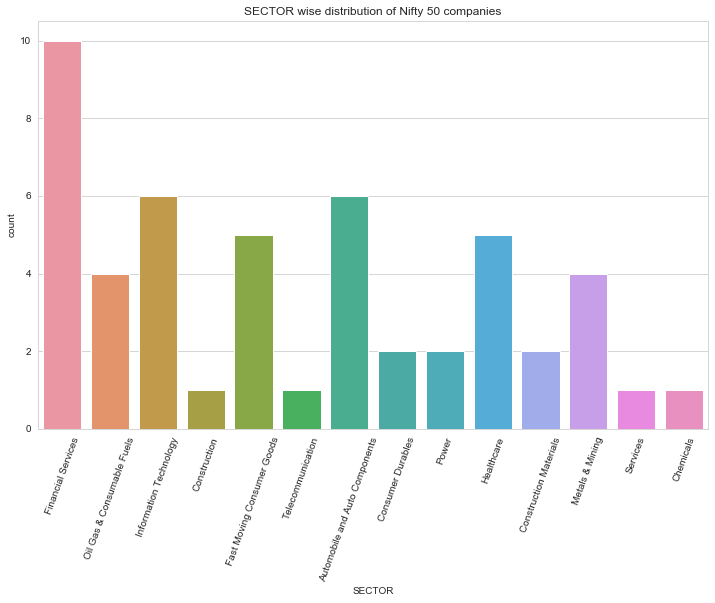

In [9]:
plt.rcParams["figure.figsize"] = [12, 7.5]
industry_plot = sns.countplot(x ='SECTOR', data = nifty50,)
sns.set_style('whitegrid')
plt.xticks(rotation=70)
plt.title('SECTOR wise distribution of Nifty 50 companies')
plt.bar_label(SECTOR_plot.containers[0])
plt.tight_layout()

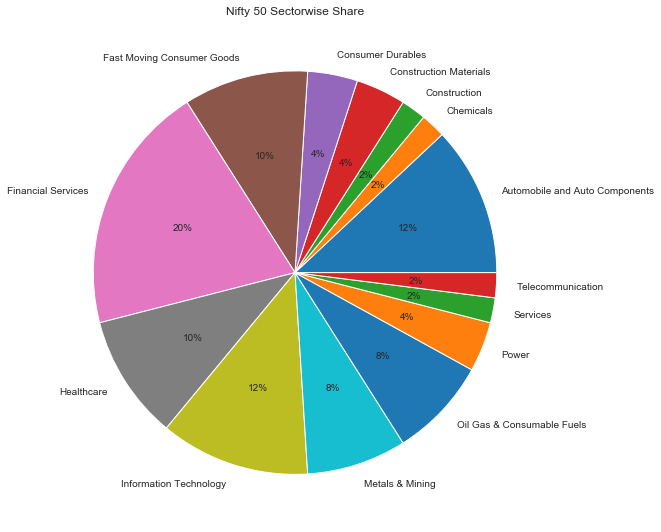

In [12]:
plt.rcParams["figure.figsize"] = [12, 7.5]
plt.pie(nifty50.groupby('SECTOR').count()['COMPANY NAME'], labels= nifty50.groupby('SECTOR').count().index ,autopct='%.0f%%')
plt.title('Nifty 50 Sectorwise Share')
plt.tight_layout()

### The above bar chart represents the number of companies by sector in the Nifty50 Index. And the pie chart represents the sector-wise share of the Nifty50 Index.

## Observation:
The financial services industry dominates the Nifty50 Index with 11 companies, which accounted for around 22% of the total index, followed by automobiles and auto components, with 6 companies and a 12% share. The IT (Information Technology), healthcare, and FMCG sectors each account for 10% of the Nifty50 index.

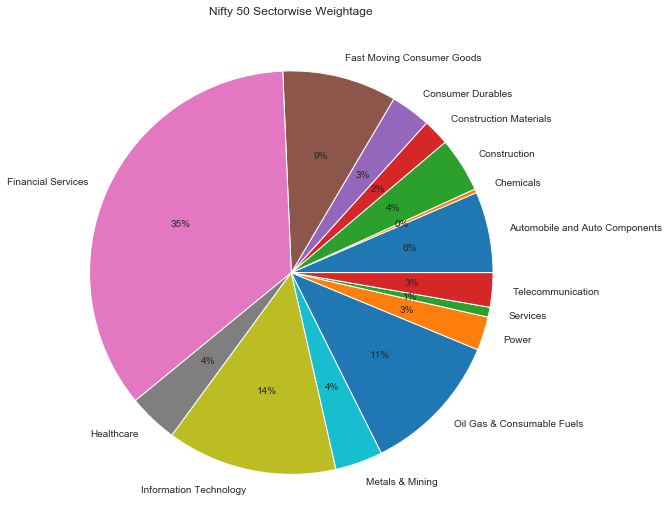

In [16]:
df = nifty50.groupby('SECTOR').sum().reset_index()
plt.rcParams["figure.figsize"] = [12, 7.5]
plt.pie(df['WEIGHTAGE (%)'],labels = df.SECTOR ,autopct='%.0f%%')
plt.title('Nifty 50 Sectorwise Weightage')
plt.tight_layout()

The pie chart represents the sector weightage in the Nifty50 Indices.

Stock Weightage
It is a combination of the market cap and the free float. So only that portion of the market that is free float (not owned by promoters and connected persons) is considered for weighting in the index. This gives a truer picture of the importance of the market.

# Observation:
From the pie chart, it is observed that the financial services sector holds more than 1/3rd of nifty50 index in terms of weightage. The IT sector ranks 2nd with around 14% weightage and holds a significant position in the Nifty50 Index.

For the further analysis we selected the IT sector stocks

In [19]:
IT = nifty50[nifty50.SECTOR == 'Information Technology'].reset_index(drop=1)
IT

,COMPANY NAME,STOCK SYMBOL,SECTOR,WEIGHTAGE (%)
0,Infosys Ltd.,INFY,Information Technology,5.80
1,Tata Consultancy Services Ltd.,TCS,Information Technology,4.05
2,HCL Technologies Ltd.,HCLTECH,Information Technology,1.63
3,Tech Mahindra Ltd.,TECHM,Information Technology,0.84
4,Wipro Ltd.,WIPRO,Information Technology,0.70
5,LTIMindtree,LTIM,Information Technology,0.61


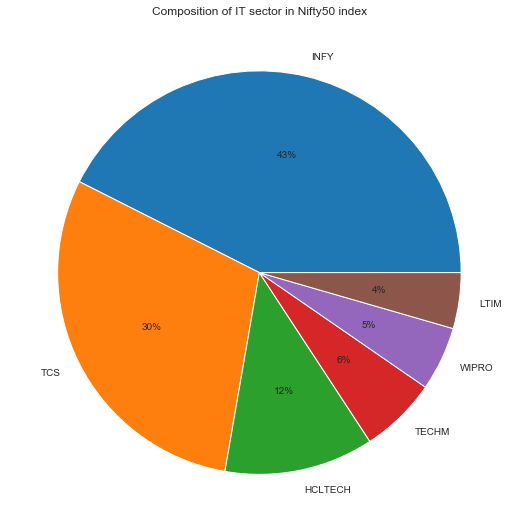

In [22]:
plt.pie(IT['WEIGHTAGE (%)'],labels = IT['STOCK SYMBOL'] ,autopct='%.0f%%')
plt.title('Composition of IT sector in Nifty50 index')
plt.tight_layout()

# Observation: 
From the above two charts its is observed that although the market cap of Infosys is 3/5th that of TCS, it has a higher weightage in the Nifty compared to TCS as the stock of TCS is still 30% owned by Tata Sons.

In [58]:
#importing HCLtech data and performing further analysis 
HCL = pd.read_csv(r"C:\Users\Gayatri parab\OneDrive\Desktop\HCLTECH.csv")
HCL.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,11-01-2000,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886910e+14,NaN,NaN,NaN
1,12-01-2000,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714350e+13,NaN,NaN,NaN
2,13-01-2000,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,14-01-2000,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256170e+13,NaN,NaN,NaN
4,17-01-2000,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535470e+13,NaN,NaN,NaN


In [59]:
HCL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5300 non-null   object 
 1   Symbol              5300 non-null   object 
 2   Series              5300 non-null   object 
 3   Prev Close          5300 non-null   float64
 4   Open                5300 non-null   float64
 5   High                5300 non-null   float64
 6   Low                 5300 non-null   float64
 7   Last                5300 non-null   float64
 8   Close               5300 non-null   float64
 9   VWAP                5300 non-null   float64
 10  Volume              5300 non-null   int64  
 11  Turnover            5300 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.2

In [60]:
#Converting Date to Datetime datatype and setting it as an Index of the DataFrame

HCL['Date'] = pd.to_datetime(HCL['Date'])
HCL.set_index('Date',inplace = True)

In [61]:
# Droping the columns which are not required for the further analysis

HCL.drop(['Series','Prev Close','Last','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble'],axis = 1,inplace =True)

In [62]:
HCL.head(2)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2000-11-01,HCLTECH,1550.0,1725.00,1492.0,1554.45,1192200
2000-12-01,HCLTECH,1560.0,1678.85,1560.0,1678.85,344850


We are going to perform the Exploratory Data Analysis (EDA) on the past five years data of each selected stock

In [63]:
# Selecting last five years data from the dataset

HCL_5 = HCL[HCL.index > '2016-04-30']
HCL_5.head(2)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2016-05-01,HCLTECH,848.95,851.05,836.4,842.8,732691
2016-06-01,HCLTECH,853.70,853.70,837.0,841.4,1398935


In [64]:
HCL_5.describe()

,Open,High,Low,Close,Volume
count,1239.000000,1239.000000,1239.000000,1239.000000,1.239000e+03
mean,873.052341,883.517514,861.599153,872.253511,3.184314e+06
std,164.671257,165.488796,163.085479,164.273421,3.350989e+06
min,410.000000,428.600000,375.250000,405.800000,2.919400e+04
25%,800.600000,811.750000,790.175000,801.750000,1.287378e+06
50%,878.450000,886.900000,868.950000,878.300000,1.942100e+06
75%,997.000000,1008.400000,979.625000,993.225000,3.900920e+06
max,1170.000000,1187.600000,1156.500000,1183.350000,3.231253e+07


# Observation:
Maximum price of the stock reached 1187.60

Minimum price of the stock reached 375.25

Average daily traded volume of the stock is 3197542

No. of trading days in the above time period is 1239 

# Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock

ValueError: Could not interpret input 'Date'

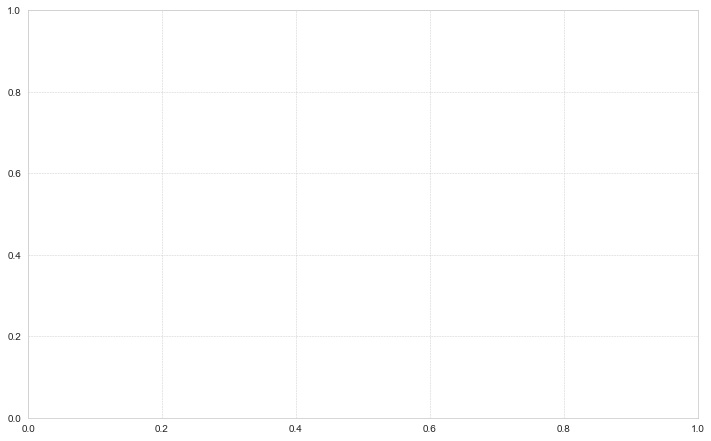

In [65]:
# Plotting the lineplot of stock closing price

plt.grid( linestyle = '--', linewidth = 0.5)
sns.lineplot(x = 'Date', y ='Close', data = HCL_5)

# Observation:
From the above line plot we can that there is a sharp fall in HCL closing price between 2019-12-04 and 2019-12-05, this is occurred due to the stock got split in the ratio of 1:2.

# Stock Split
**A stock split or stock divide increases the number of shares in a company. For example, after a 2-for-1 split, each investor will own double the number of shares, and each share will be worth half as much. A stock split causes a decrease of market price of individual shares, but does not change the total market capitalization of the company: stock dilution does not occur.**


# But this closing price does not reflect a true picture of the returns of the stock. Therefore, we have to add a new column where we calculate the split adjusted price of each stock.

In [33]:
# Adding a column (Split_Adj_Price)
HCL_5['Split_Adj_Price'] = HCL_5['Close']

# Calculating the split Adjusted Price  
HCL_5.loc[HCL_5.index < '2019-12-05', 'Split_Adj_Price'] = HCL_5['Split_Adj_Price']/2

HCL_5.loc[(HCL_5.index >='2019-12-02') &  (HCL_5.index <= '2019-12-08')]

,Symbol,Open,High,Low,Close,Volume,Split_Adj_Price
Date,,,,,,,
2019-12-02,HCLTECH,1139.00,1139.00,1123.50,1125.30,1497958,562.650
2019-12-03,HCLTECH,1129.95,1131.00,1121.00,1124.55,1783831,562.275
2019-12-04,HCLTECH,1127.00,1130.00,1116.45,1125.50,2951568,562.750
2019-12-05,HCLTECH,563.80,567.65,557.15,560.90,2683884,560.900
2019-12-06,HCLTECH,563.90,567.05,558.65,560.30,1659752,560.300


In [34]:
sns.lineplot(x = 'Date', y = 'Split_Adj_Price', data = HCL_5)

ValueError: Could not interpret input 'Date'